<a href="https://colab.research.google.com/github/Nithya07shree/colab-notes-aiml/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    # input: 1 channel (grayscale), output: 32 filters, kernel: 3*3
    self.conv1 = nn.Conv2d(1,32, kernel_size = 3, padding=1)
    self.pool = nn.MaxPool2d(2,2) # reduces 28*28 to 14*14
    #  MLP ip-size and op size (10 classes of digits)
    self.fc1 = nn.Linear(32*14*14, 10)

  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    # flattening
    x = x.view(-1,32*14*14)
    x=self.fc1(x)
    return x

train the model on the MNIST Dataset

In [13]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [3]:
# convert images to tensors and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # Mean and Std Dev of MNIST
])

# containers that actually store the images and labels
train_dataset = datasets.MNIST(root='./data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST(root='./data', train = False, download = True, transform = transform)

# wrappers around the dataset that controls how data is fed into the model during training and testing loops
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 64, shuffle = False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 54.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.79MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.10MB/s]


In [4]:
for images, labels in train_loader:
  print(images.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 28, 28])
torch.Size([64, 1, 2

architecture: input image -> conv layer -> ReLU -> pooling -> flatten -> MLP

outputSize = [(input+ 2*padding -kernel)/stride] +1
p=kernel-1, kernel usually 3*3 or 5*5
stride = 1 for extraction, 2 for downsampling

In [17]:
class cnnDigits(nn.Module):
  def __init__(self):
    super(cnnDigits,self).__init__()
    self.conv1 = nn.Conv2d(1,32,kernel_size=3,padding=1)
    self.bn1 = nn.BatchNorm2d(32)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(32*14*14,10)
  def forward(self,x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = x.view(-1,32*14*14) # flatten: batch, channels, height, width
    x = self.fc1(x)
    return x

In [18]:
import torch.optim as optim
model = cnnDigits()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

def train(epochs=5):
  model.train()
  for epoch in range(epochs):
    total_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad() # reset gradients
            output = model(data) # train model
            loss = criterion(output, target) # calculate loss
            loss.backward() # calculate gradient
            optimizer.step() # update weights
            total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader)}")

def test():
  model.eval()
  correct=0
  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images) # train model
      pred = outputs.argmax(dim=1, keepdim=True)
      correct += pred.eq(labels.view_as(pred)).sum().item()
  accuracy = 100. * correct / len(test_loader.dataset)
  print(f"Test Accuracy: {accuracy}%")

In [19]:
train(5)

Epoch 1/5, Loss: 0.1790064359942614
Epoch 2/5, Loss: 0.074172358834562
Epoch 3/5, Loss: 0.057972344383944885
Epoch 4/5, Loss: 0.046868389311766845
Epoch 5/5, Loss: 0.03851760071411884


In [20]:
test()

Test Accuracy: 97.99%


Visualization

In [24]:
for images, labels in test_loader:
    for i in range(len(labels)):
        if labels[i].item() == 7:
            sample_image = images[i]
            sample_label = labels[i].item()
            break
print(f"sample {sample_label}")
print(f"Image shape: {sample_image.shape}")

sample 7
Image shape: torch.Size([1, 28, 28])


In [26]:
class cnnDigitsFeatureExtractor(cnnDigits):
  def forward(self, x):
    # Return output after conv1, bn1, and ReLU
    x = F.relu(self.bn1(self.conv1(x)))
    return x.detach().cpu()

print("Defined cnnDigitsFeatureExtractor class")

Defined cnnDigitsFeatureExtractor class


In [28]:
feature_extractor = cnnDigitsFeatureExtractor()
feature_extractor.load_state_dict(model.state_dict())
feature_extractor.eval()
feature_maps = feature_extractor(sample_image.unsqueeze(0))

print(f"Shape of extracted feature maps: {feature_maps.shape}")

Shape of extracted feature maps: torch.Size([1, 32, 28, 28])


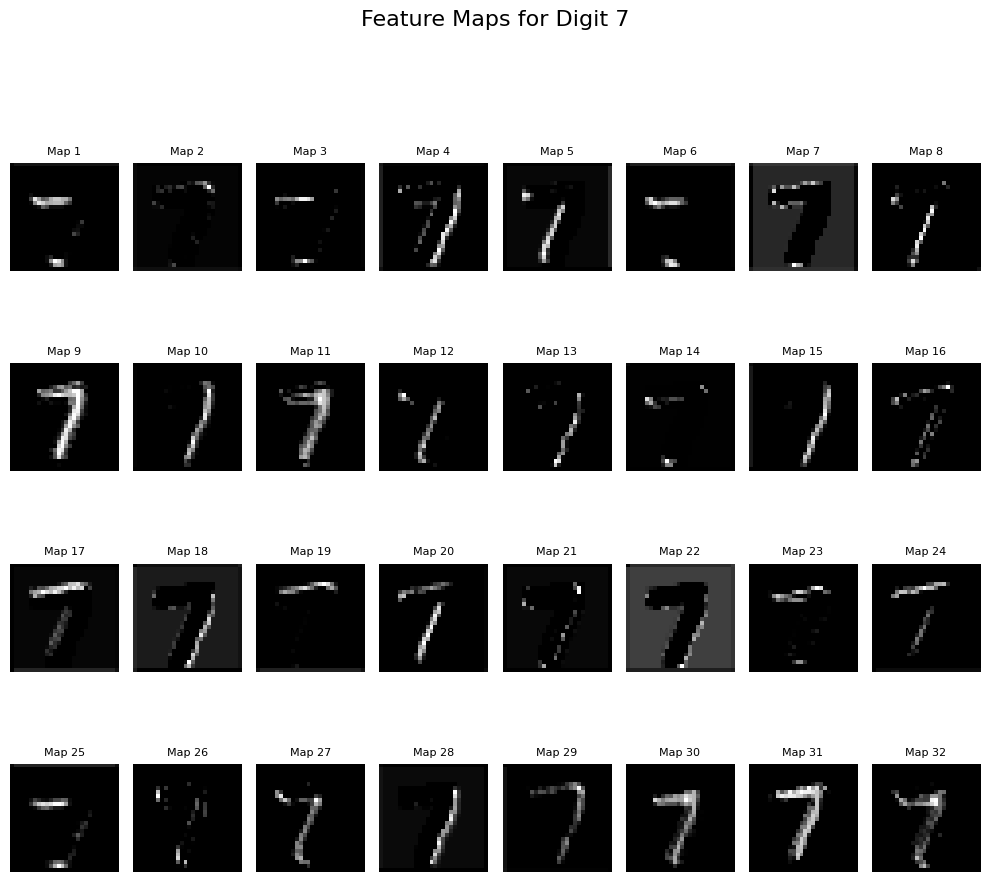

Feature maps visualized.


In [29]:
import matplotlib.pyplot as plt

# Visualize the feature maps
fig = plt.figure(figsize=(10, 10))
num_feature_maps = feature_maps.shape[1] # Should be 32

for i in range(num_feature_maps):
    ax = fig.add_subplot(4, 8, i + 1) # Create a 4x8 grid for 32 feature maps
    ax.imshow(feature_maps[0, i].numpy(), cmap='gray') # Display each feature map
    ax.axis('off') # Hide axes
    ax.set_title(f'Map {i+1}', fontsize=8)

plt.suptitle(f'Feature Maps for Digit {sample_label}', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("Feature maps visualized.")